# Answer 2

In [1]:
pip install yfinance pandas

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ----------------- ---------------------- 1.3/3.0 MB 6.7 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.0 MB 7.3 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 6.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------------- -- 1.3/1.4 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139100 sha256=1d11e1343919bc3b326e22d05b05aadf389d2ce6301e86def9bd72aa2

In [39]:
# Importing the required libraries
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Checking the nomenclature and availability of data on Yahoo Finanace for one company
ticker = "SUNPHARMA.NS"
stock = yf.Ticker(ticker)

print("Available quarterly balance sheet columns:")
print(stock.quarterly_balance_sheet.columns)

print("\nAvailable quarterly balance sheet rows:")
print(stock.quarterly_balance_sheet.index)

Available quarterly balance sheet columns:
DatetimeIndex(['2024-09-30', '2024-03-31', '2023-09-30'], dtype='datetime64[ns]', freq=None)

Available quarterly balance sheet rows:
Index(['Treasury Shares Number', 'Ordinary Shares Number', 'Share Issued',
       'Total Debt', 'Tangible Book Value', 'Invested Capital',
       'Working Capital', 'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Minority Interest',
       'Stockholders Equity', 'Other Equity Interest', 'Retained Earnings',
       'Additional Paid In Capital', 'Capital Stock', 'Common Stock',
       'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities', 'Liabilities Heldfor Sale Non Current',
       'Derivative Product Liabilities',
       'Non Current Pension And Other Postretirement Benefit Plans',
       'Non Current Deferred Revenue

# Generating the dataset

In [23]:
# 40 pharma companies (ticker: NSE format)
companies = {
    "Sun Pharma": "SUNPHARMA.NS",
    "Dr. Reddy's": "DRREDDY.NS",
    "Cipla": "CIPLA.NS",
    "Divi's Labs": "DIVISLAB.NS",
    "Aurobindo Pharma": "AUROPHARMA.NS",
    "Lupin": "LUPIN.NS",
    "Zydus Lifesciences": "ZYDUSLIFE.NS",
    "Torrent Pharma": "TORNTPHARM.NS",
    "Alkem Labs": "ALKEM.NS",
    "Biocon": "BIOCON.NS",
    "Ajanta Pharma": "AJANTPHARM.NS",
    "Alembic Pharma": "APLLTD.NS",
    "Glenmark": "GLENMARK.NS",
    "Natco Pharma": "NATCOPHARM.NS",
    "Granules India": "GRANULES.NS",
    "Strides Pharma": "STAR.NS",
    "Indoco Remedies": "INDOCO.NS",
    "Sequent Scientific": "SEQUENT.NS",
    "Shilpa Medicare": "SHILPAMED.NS",
    "Suven Pharma": "SUVENPHAR.NS",
    "Lincoln Pharma": "LINCOLN.NS",
    "Caplin Point": "CAPLIPOINT.NS",
    "FDC": "FDC.NS",
    "Hester Biosciences": "HESTERBIO.NS",
    "Marksans Pharma": "MARKSANS.NS",
    "Unichem Labs": "UNICHEMLAB.NS",
    "Jubilant Pharmova": "JUBLPHARMA.NS",
    "Orchid Pharma": "ORCHPHARMA.NS",
    "Aarti Drugs": "AARTIDRUGS.NS",
    "Wockhardt": "WOCKPHARMA.NS",
    "Ipca Labs": "IPCALAB.NS",
    "Eris Lifesciences": "ERIS.NS",
    "Gland Pharma": "GLAND.NS",
    "Neuland Labs": "NEULANDLAB.NS",
    "Morepen Labs": "MOREPENLAB.NS",
    "AstraZeneca India": "ASTRAZEN.NS",
    "JB Chemicals": "JBCHEPHARM.NS",
    "Hikal": "HIKAL.NS",
    "Gufic Bio": "GUFICBIO.NS",
    "Balaji Amines": "BALAMINES.NS"
}

target_date = "2024-03-31" # Q4 FY2024

In [24]:
def fetch_financials(name, ticker): # Function to fetch financials
    stock = yf.Ticker(ticker)
    try:
        # Quarterly financials and balance sheet
        income = stock.quarterly_financials
        balance = stock.quarterly_balance_sheet

        # Check if the target quarter is present in both datasets
        if target_date not in income.columns or target_date not in balance.columns:
            print(f"Skipping {name}, missing data for {target_date.date()}")
            return None

        income_data = income[target_date]
        balance_data = balance[target_date]

        # Extract values using keys found earlier: these are possible keys that might in the balance sheet — fallback options
        equity_keys = ["Stockholders Equity", "Common Stock Equity", "Total Equity Gross Minority Interest", "Total Capitalization"]
        debt_keys = ["Total Debt", "Long Term Debt", "Current Debt"]
        current_assets_key = "Current Assets"
        current_liabilities_key = "Current Liabilities"
        # Helper function to get the first non-null value for any key in the provided keys list from the data source
        def first_valid(keys, source):
            for k in keys:
                if k in source.index: # Check if key exists in the balance sheet/income statement rows
                    val = source[k]
                    if not pd.isna(val): # Check value is not NaN
                        return val
            return None
        
        equity = first_valid(equity_keys, balance_data)
        debt = first_valid(debt_keys, balance_data)
        current_assets = balance_data.get(current_assets_key, None)
        current_liabilities = balance_data.get(current_liabilities_key, None)
        inventory = balance_data.get("Inventory", None)

        # Income statement items
        net_income = income_data.get("Net Income", None)
        operating_income = income_data.get("Operating Income", None)
        revenue = income_data.get("Total Revenue", None)
        cogs = income_data.get("Cost Of Revenue", None)

        info = stock.info
        share_price = info.get("currentPrice")
        eps = info.get("trailingEps")
        shares_outstanding = info.get("sharesOutstanding")

        # Return all extracted values as a dictionary
        return {
            "Company": name,
            "Ticker": ticker,
            "Net Income": net_income,
            "Operating Income": operating_income,
            "Revenue": revenue,
            "COGS": cogs,
            "Equity": equity,
            "Debt": debt,
            "Current Assets": current_assets,
            "Current Liabilities": current_liabilities,
            "Inventory": inventory,
            "Share Price": share_price,
            "EPS (TTM)": eps,
            "Shares Outstanding": shares_outstanding
        }

    except Exception as e:
        print(f"Error fetching {name}: {e}")
        return None

# Main loop to fetch data for all companies and store results
results = []
for name, ticker in companies.items():
    data = fetch_financials(name, ticker)
    if data:
        results.append(data)

# Convert to DataFrame
df = pd.DataFrame(results)

print(df)
df.to_csv("pharma_Q4_FY24_financials.csv", index=False)

               Company         Ticker    Net Income  Operating Income  \
0           Sun Pharma   SUNPHARMA.NS  2.654580e+10      2.478990e+10   
1          Dr. Reddy's     DRREDDY.NS  1.307000e+10      1.327800e+10   
2                Cipla       CIPLA.NS  9.390400e+09      1.156150e+10   
3          Divi's Labs    DIVISLAB.NS  5.380000e+09      6.430000e+09   
4     Aurobindo Pharma  AUROPHARMA.NS  9.087500e+09      1.402130e+10   
5                Lupin       LUPIN.NS  3.594300e+09      7.331000e+09   
6   Zydus Lifesciences   ZYDUSLIFE.NS  1.182300e+10      1.420200e+10   
7       Torrent Pharma  TORNTPHARM.NS  4.493800e+09      6.923500e+09   
8           Alkem Labs       ALKEM.NS  2.935600e+09      3.572200e+09   
9               Biocon      BIOCON.NS  1.355000e+09      1.398000e+09   
10       Ajanta Pharma  AJANTPHARM.NS  2.027200e+09      2.531700e+09   
11      Alembic Pharma      APLLTD.NS  1.782100e+09      1.934400e+09   
12            Glenmark    GLENMARK.NS -1.218282e+10

In [25]:
# Getting total assets from balance sheet
def get_total_assets(stock, date):
    balance = stock.quarterly_balance_sheet
    if date in balance.columns and "Total Assets" in balance.index:
        return balance[date].get("Total Assets")
    return None

# Add Total Assets for ratio calculations
df["Total Assets"] = None
for i, row in df.iterrows():
    try:
        stock = yf.Ticker(row["Ticker"])
        total_assets = get_total_assets(stock, target_date)
        df.at[i, "Total Assets"] = total_assets
    except:
        continue

# Calculate Financial Ratios
df["Current Ratio"] = df["Current Assets"] / df["Current Liabilities"]
df["Debt to Equity"] = df["Debt"] / df["Equity"]
df["Inventory Turnover"] = df["COGS"] / df["Inventory"]
df["Return on Equity (ROE)"] = df["Net Income"] / df["Equity"]
df["Operating Margin"] = df["Operating Income"] / df["Revenue"]
df["P/E Ratio"] = df["Share Price"] / df["EPS (TTM)"]
df["Book Value per Share"] = df["Equity"] / df["Shares Outstanding"]
# 3 new ratios
df["Asset Turnover"] = df["Revenue"] / df["Total Assets"]
df["Debt Ratio"] = df["Debt"] / df["Total Assets"]
df["Net Profit Margin"] = df["Net Income"] / df["Revenue"]

In [26]:
# Save final dataset with ratios
df.to_csv("pharma_Q4_FY24_with_ratios.csv", index=False)
print(df[[
    "Company", "Ticker",
    "Current Ratio", "Debt to Equity", "Inventory Turnover",
    "Return on Equity (ROE)", "Operating Margin", "P/E Ratio",
    "Book Value per Share", "Asset Turnover", "Debt Ratio", "Net Profit Margin"
]].head())

            Company         Ticker  Current Ratio  Debt to Equity  \
0        Sun Pharma   SUNPHARMA.NS       2.559701        0.051419   
1       Dr. Reddy's     DRREDDY.NS       2.582794        0.071360   
2             Cipla       CIPLA.NS       3.706112        0.020947   
3       Divi's Labs    DIVISLAB.NS       7.570423        0.000221   
4  Aurobindo Pharma  AUROPHARMA.NS       1.984210        0.222755   

   Inventory Turnover  Return on Equity (ROE)  Operating Margin  P/E Ratio  \
0            0.383801                0.041695          0.209847  35.236501   
1            0.461779                0.046587          0.187463  18.135043   
2            0.538938                0.035162          0.190082  22.763804   
3            0.327261                0.039643          0.285271  78.696286   
4            0.376642                0.030451          0.187152  20.028442   

   Book Value per Share Asset Turnover Debt Ratio  Net Profit Margin  
0            265.352197       0.138228   0.03

## Missing Value Handling

In [31]:
# Show count of missing values in each column
missing_counts = df.isnull().sum()
print(missing_counts)

Company                   0
Ticker                    0
Net Income                0
Operating Income          0
Revenue                   0
COGS                      0
Equity                    0
Debt                      0
Current Assets            0
Current Liabilities       0
Inventory                 0
Share Price               0
EPS (TTM)                 0
Shares Outstanding        0
Total Assets              0
Current Ratio             0
Debt to Equity            0
Inventory Turnover        0
Return on Equity (ROE)    0
Operating Margin          0
P/E Ratio                 0
Book Value per Share      0
Asset Turnover            0
Debt Ratio                0
Net Profit Margin         0
dtype: int64


In [35]:
# List of columns to convert
cols_to_convert = [
    "Current Ratio", "Debt to Equity", "Inventory Turnover",
    "Return on Equity (ROE)", "Operating Margin", "P/E Ratio",
    "Book Value per Share", "Asset Turnover", "Debt Ratio", "Net Profit Margin"
]

# Convert to numeric and coerce errors (e.g., convert strings like 'N/A' to NaN)
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

print(df[cols_to_convert].dtypes)

Current Ratio             float64
Debt to Equity            float64
Inventory Turnover        float64
Return on Equity (ROE)    float64
Operating Margin          float64
P/E Ratio                 float64
Book Value per Share      float64
Asset Turnover            float64
Debt Ratio                float64
Net Profit Margin         float64
dtype: object


# EDA

In [36]:
df.describe()

,Net Income,Operating Income,Revenue,COGS,Equity,Debt,Current Assets,Current Liabilities,Inventory,Share Price,...,Current Ratio,Debt to Equity,Inventory Turnover,Return on Equity (ROE),Operating Margin,P/E Ratio,Book Value per Share,Asset Turnover,Debt Ratio,Net Profit Margin
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2.316025e+09,3.429693e+09,1.911511e+10,8.054724e+09,7.844883e+10,1.495894e+10,6.020118e+10,2.934202e+10,1.836610e+10,1757.316250,...,2.811517,0.297668,0.557000,0.023776,0.154538,27.468560,277.368775,0.175849,0.144502,0.095831
std,5.619919e+09,5.281341e+09,2.545222e+10,9.858990e+09,1.205510e+11,2.791731e+10,8.793451e+10,4.165818e+10,2.462209e+10,2236.260097,...,2.143086,0.334820,0.270705,0.038606,0.126005,74.671934,201.995512,0.056857,0.135419,0.146404
min,-1.218282e+10,-8.972220e+08,7.925500e+08,3.584600e+08,2.917930e+09,1.066800e+07,2.146150e+09,9.227710e+08,7.558100e+08,66.590000,...,0.782515,0.000221,0.265622,-0.155236,-0.413847,-198.351955,15.461630,0.068909,0.000194,-0.403939
25%,2.404962e+08,4.679870e+08,3.839671e+09,1.857517e+09,1.282416e+10,1.252328e+09,9.636306e+09,3.989957e+09,3.346261e+09,548.475000,...,1.518089,0.038974,0.399402,0.019574,0.121330,20.298805,158.951567,0.143965,0.028492,0.065305
50%,6.779795e+08,1.355575e+09,7.581105e+09,3.171544e+09,2.754724e+10,5.362850e+09,2.243036e+10,9.342800e+09,6.702500e+09,1137.550000,...,2.153353,0.123687,0.470460,0.030910,0.159593,30.738987,247.355795,0.178192,0.089016,0.124092
75%,2.254300e+09,3.605785e+09,2.364328e+10,8.874475e+09,8.066906e+10,1.579270e+10,6.090884e+10,3.158082e+10,2.481745e+10,1688.200000,...,3.144886,0.591318,0.592876,0.040569,0.214098,51.374881,331.890142,0.206271,0.293479,0.169714
max,2.654580e+10,2.478990e+10,1.181333e+11,3.787460e+10,6.366675e+11,1.627670e+11,4.347498e+11,1.698440e+11,9.868290e+10,11156.000000,...,11.816998,1.184093,1.529959,0.065999,0.433082,211.682353,999.777707,0.355466,0.430988,0.368501


In [37]:
# Set plot style
sns.set(style="whitegrid")

# Select numeric ratio columns for EDA
ratio_columns = [
    "Current Ratio", "Debt to Equity", "Inventory Turnover",
    "Return on Equity (ROE)", "Operating Margin", "P/E Ratio",
    "Book Value per Share", "Asset Turnover", "Debt Ratio", "Net Profit Margin"
]

# Basic statistics summary
summary_stats = df[ratio_columns].describe()
summary_stats

,Current Ratio,Debt to Equity,Inventory Turnover,Return on Equity (ROE),Operating Margin,P/E Ratio,Book Value per Share,Asset Turnover,Debt Ratio,Net Profit Margin
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2.811517,0.297668,0.557000,0.023776,0.154538,27.468560,277.368775,0.175849,0.144502,0.095831
std,2.143086,0.334820,0.270705,0.038606,0.126005,74.671934,201.995512,0.056857,0.135419,0.146404
min,0.782515,0.000221,0.265622,-0.155236,-0.413847,-198.351955,15.461630,0.068909,0.000194,-0.403939
25%,1.518089,0.038974,0.399402,0.019574,0.121330,20.298805,158.951567,0.143965,0.028492,0.065305
50%,2.153353,0.123687,0.470460,0.030910,0.159593,30.738987,247.355795,0.178192,0.089016,0.124092
75%,3.144886,0.591318,0.592876,0.040569,0.214098,51.374881,331.890142,0.206271,0.293479,0.169714
max,11.816998,1.184093,1.529959,0.065999,0.433082,211.682353,999.777707,0.355466,0.430988,0.368501


In [45]:
# Create boolean masks for problematic cases
negative_pe = df['P/E Ratio'] < 0
low_roe = df['Return on Equity (ROE)'] < 0
negative_net_margin = df['Net Profit Margin'] < 0
low_operating_margin = df['Operating Margin'] < 0
unusual_book_value = df['Book Value per Share'] > 800  # arbitrary, based on your max
high_pe = df['P/E Ratio'] > 100

# Combine them into a single DataFrame for visibility
anomalies = df[
    negative_pe |
    low_roe |
    negative_net_margin |
    low_operating_margin |
    unusual_book_value |
    high_pe
].copy()

# Add flags for each issue
anomalies['Negative P/E'] = negative_pe
anomalies['Negative ROE'] = low_roe
anomalies['Negative Net Margin'] = negative_net_margin
anomalies['Negative Operating Margin'] = low_operating_margin
anomalies['High Book Value'] = unusual_book_value
anomalies['High P/E'] = high_pe

# Show flagged anomalies
print(anomalies[[
    "Company", "Ticker", "P/E Ratio", "Return on Equity (ROE)", "Net Profit Margin",
    "Operating Margin", "Book Value per Share",
    "Negative P/E", "Negative ROE", "Negative Net Margin",
    "Negative Operating Margin", "High Book Value", "High P/E"
]])

               Company         Ticker   P/E Ratio  Return on Equity (ROE)  \
8           Alkem Labs       ALKEM.NS   29.350058                0.028468   
12            Glenmark    GLENMARK.NS -198.351955               -0.155236   
16     Indoco Remedies      INDOCO.NS -152.256250                0.020443   
17  Sequent Scientific     SEQUENT.NS  211.682353               -0.001388   
25        Unichem Labs  UNICHEMLAB.NS -155.447942               -0.054736   
26   Jubilant Pharmova  JUBLPHARMA.NS   20.333207               -0.010784   
27       Orchid Pharma  ORCHPHARMA.NS   34.433318                0.028668   
29           Wockhardt  WOCKPHARMA.NS -102.570773               -0.050313   
33        Neuland Labs  NEULANDLAB.NS   55.066884                0.052671   
35   AstraZeneca India    ASTRAZEN.NS  207.224681                0.055454   

    Net Profit Margin  Operating Margin  Book Value per Share  Negative P/E  \
8            0.108426          0.131938            862.464768         Fal

In [46]:
print("Anomaly Summary:")
print({
    "Negative P/E": negative_pe.sum(),
    "Negative ROE": low_roe.sum(),
    "Negative Net Profit Margin": negative_net_margin.sum(),
    "Negative Operating Margin": low_operating_margin.sum(),
    "Very High Book Value": unusual_book_value.sum(),
    "Very High P/E Ratio": high_pe.sum()
})

Anomaly Summary:
{'Negative P/E': 4, 'Negative ROE': 5, 'Negative Net Profit Margin': 5, 'Negative Operating Margin': 3, 'Very High Book Value': 2, 'Very High P/E Ratio': 2}


**P/E Ratio** - Glenmark, Indoco, Unichem, and Wockhardt have **negative** P/E due to **negative EPS**.

**High P/E Ratio** - Sequent and AstraZeneca have **P/E > 200**, this suggests overvaluation or speculative pricing.

**Negative ROE** - Indicates shareholder value destruction. Companies: Glenmark, Sequent, Unichem, Jubilant, Wockhardt.

**Negative Net Margin** - Same companies with negative ROE, reflects **net losses**.          

**Negative Operating Margin** - Particularly severe in Orchid Pharma and Wockhardt, **core operations are loss-making**.  

**High Book Value** - Alkem and Neuland have **very high book value**, could be due to large retained earnings, undervaluation, or asset-heavy businesses.


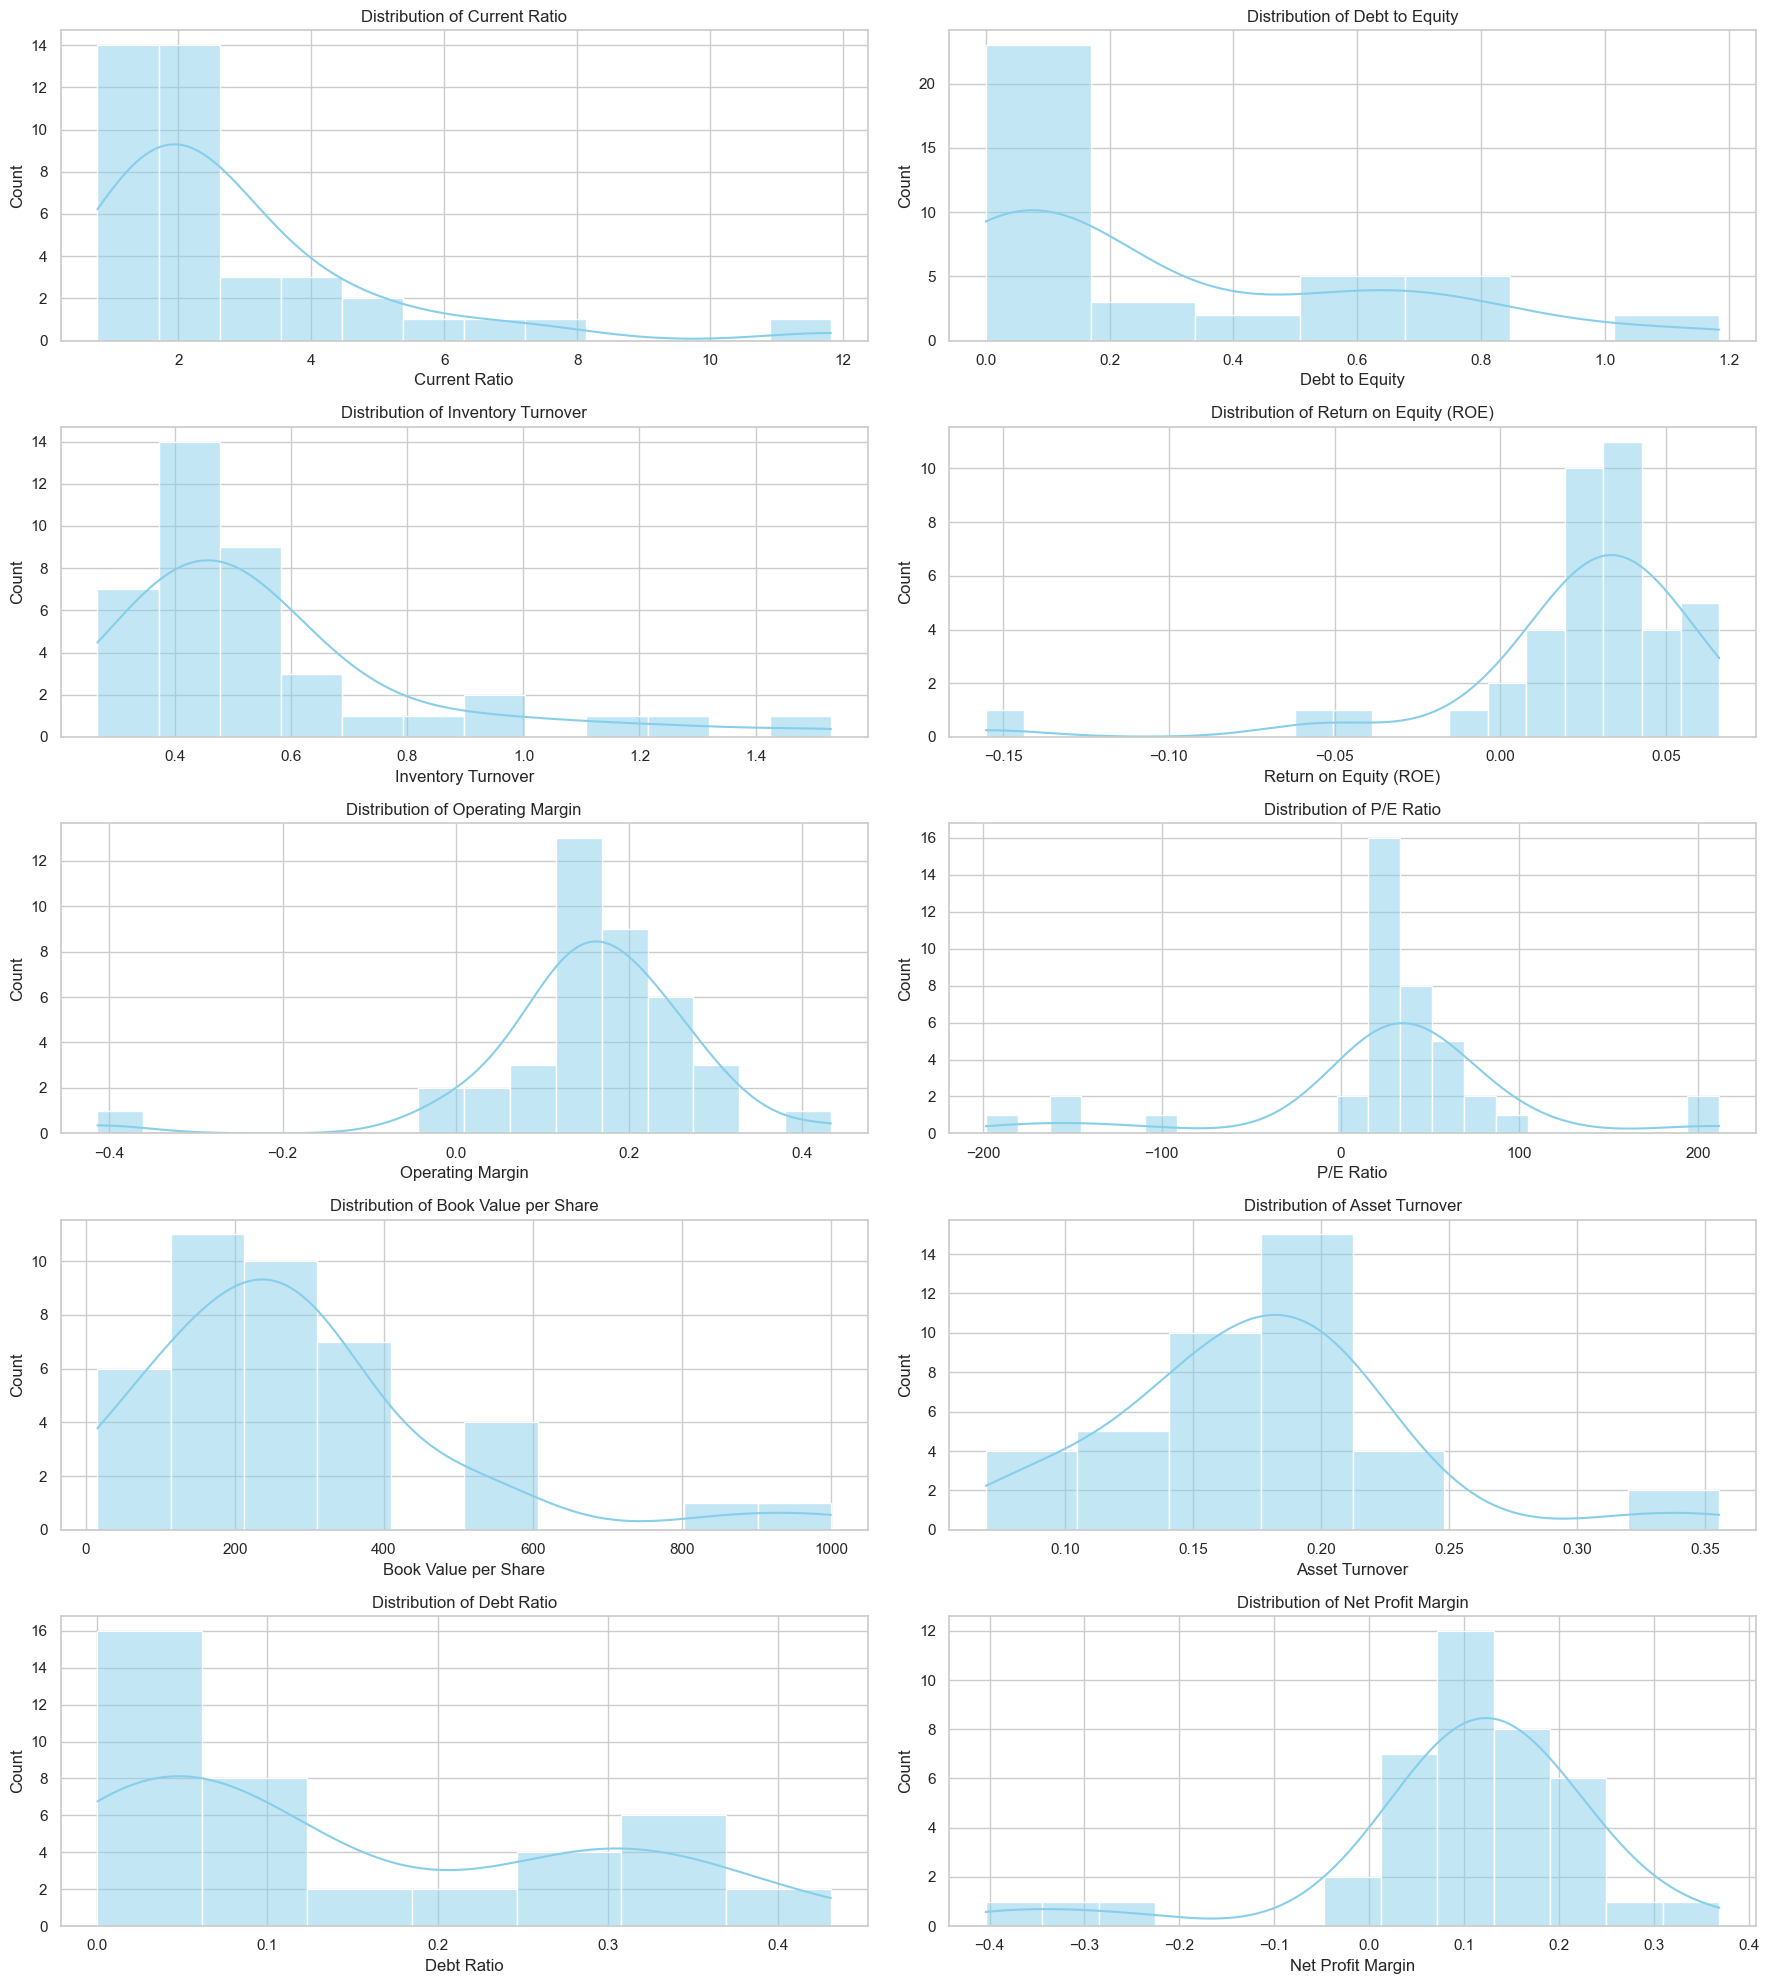

In [47]:
# Plot distributions
fig, axes = plt.subplots(5, 2, figsize=(18, 20))
axes = axes.flatten()
for i, col in enumerate(ratio_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

1. Current Ratio:
Right-skewed: Most companies have a reasonable liquidity buffer (around 1.5–3.0)
Outliers: A few have very high values (10+), possibly low short-term liabilities

2. Debt to Equity: Most are clustered around 0–1, which is healthy

3. Inventory Turnover:
Moderate skew, most companies are around 0.4–0.6
Higher turnover (1.2+) in a few, suggesting faster inventory movement

4. Return on Equity (ROE):
Sharp peak near zero: Many companies have marginal ROE
Negative ROE prevalent, several firms are losing money on shareholder equity

5. Operating Margin:
Center around 0.15–0.20 => decent profitability
Some negative values indicate operating losses

6. P/E Ratio:
Heavy tails: Many negative or very high values
Reinforces earlier point: several firms with losses or overvaluation

7. Book Value per Share:
Right-skewed: Few firms have extremely high book value (likely due to capital-intensive models)

8. Asset Turnover:
Appears normally distributed
Suggests consistent asset efficiency across the industry

9. Debt Ratio:
Clusters around 0.05 to 0.15
Low debt burden in general, conservative financing structures

10. Net Profit Margin:
Centered around 0.10 to 0.20, some outliers negative.
Indicates solid net margins for most, with a few significant loss-makers

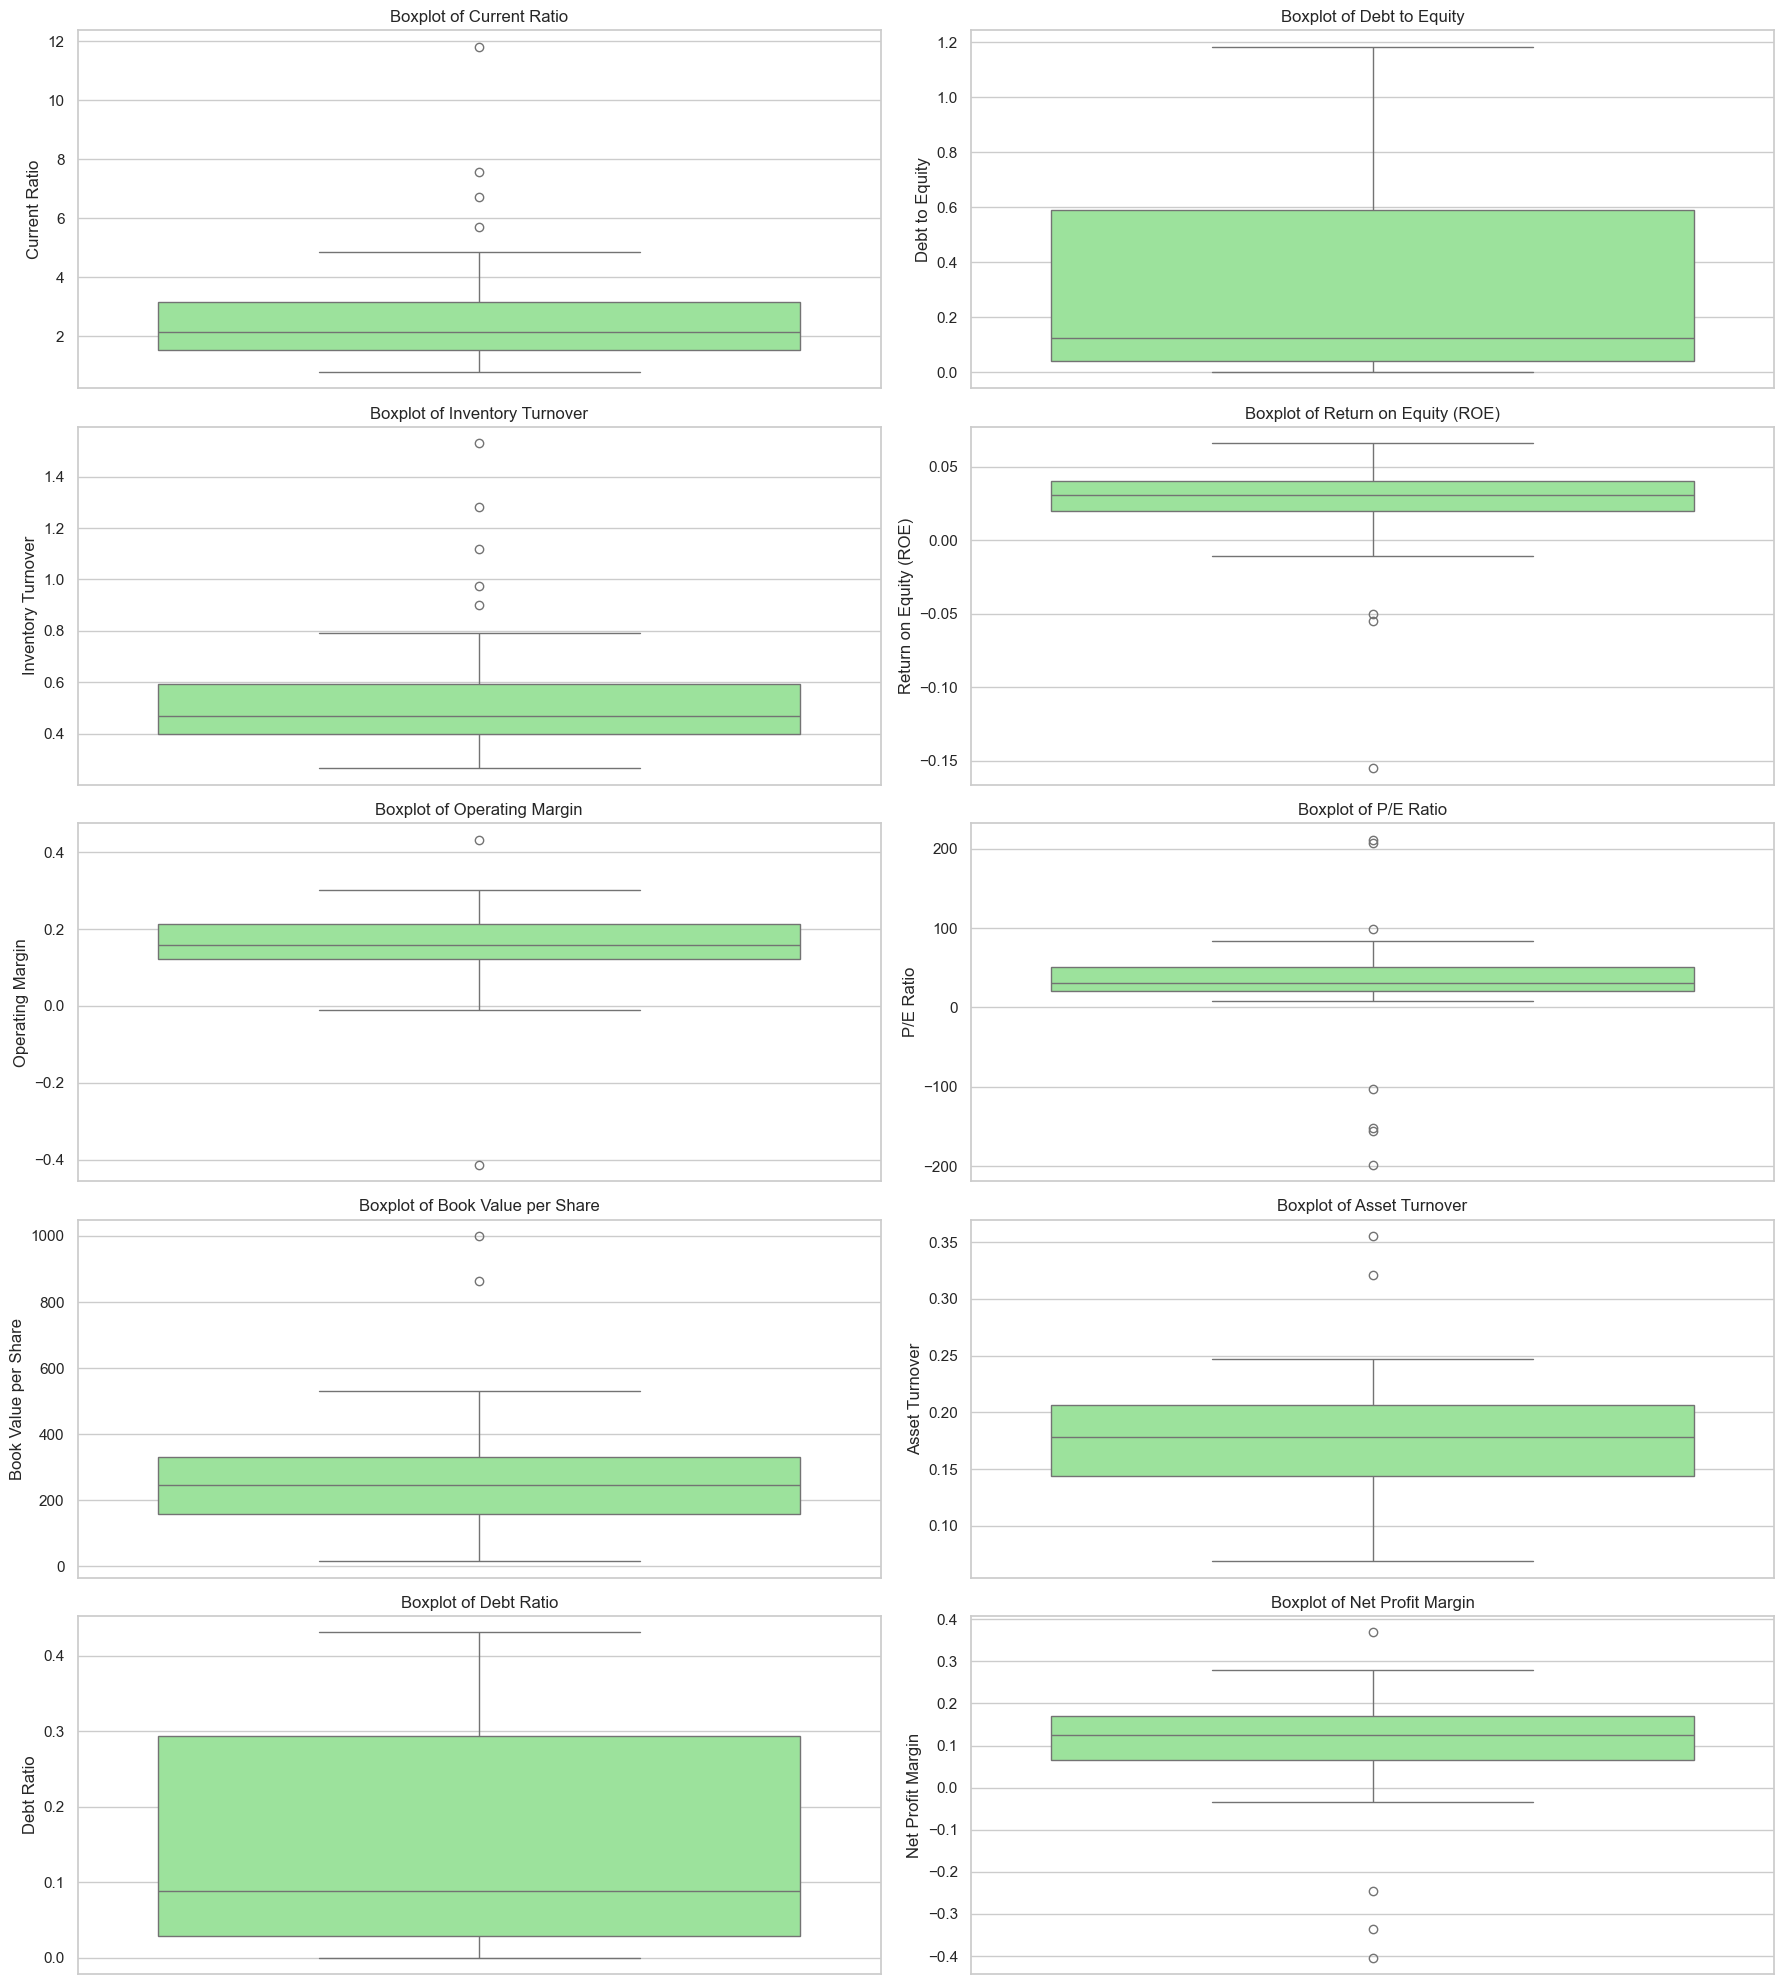

In [48]:
# Boxplots to identify outliers
fig, axes = plt.subplots(5, 2, figsize=(18, 20))
axes = axes.flatten()
for i, col in enumerate(ratio_columns):
    sns.boxplot(data=df, y=col, ax=axes[i], color="lightgreen")
    axes[i].set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

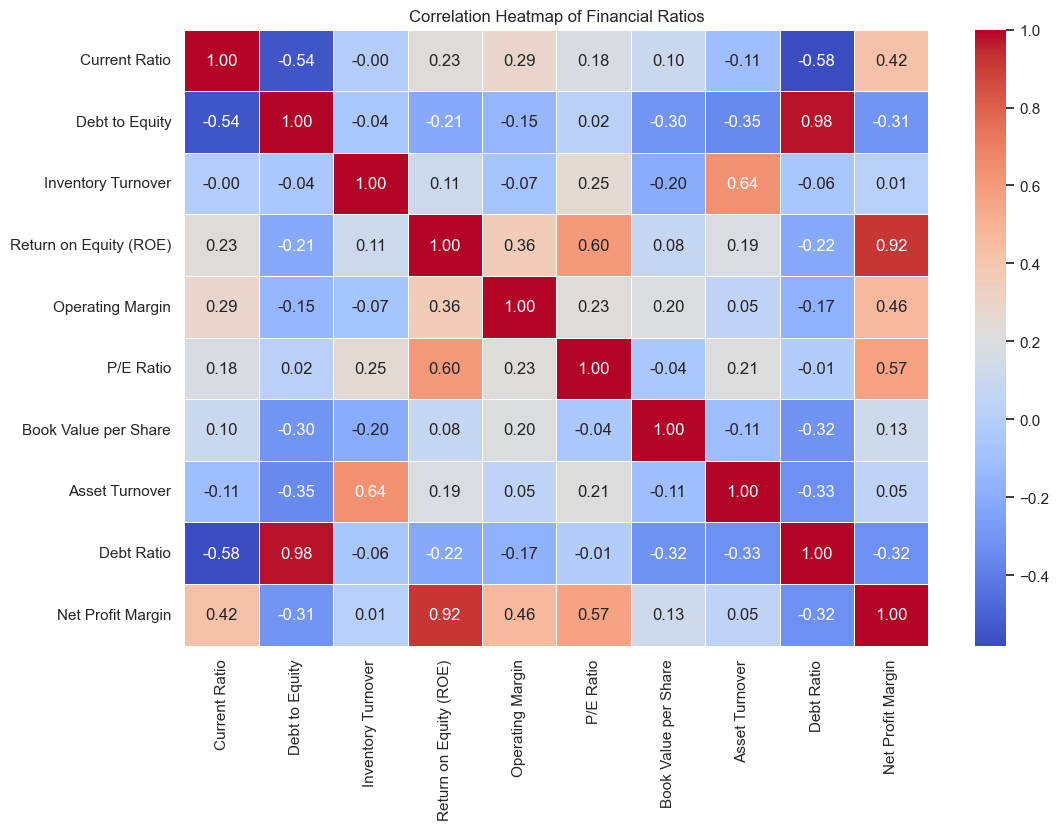

In [49]:
# Correlation heatmap
correlation = df[ratio_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Financial Ratios")
plt.show()

Observations:
1. ROE is strongly correlated with NPM (0.92), P/E (0.60), and Op Margin (0.36).
2. Current Ratio is a good liquidity-leverage counterbalance; it negatively correlates with leverage metrics and positively with NPM.
3. For efficiency, these can be used: Asset Turnover, Inventory Turnover, ROE
4. For leverage: Debt Ratio, D/E, Current Ratio (inversely)
5. For valuation: P/E, ROE

In [51]:
print("Top and Bottom Performers by Ratio\n")

for ratio in ratio_columns:
    if ratio not in df.columns:
        print(f"Warning: {ratio} not found in DataFrame columns.\n")
        continue
    
    # Drop NaNs for ranking
    valid_df = df.dropna(subset=[ratio])
    
    print(f"Ratio: {ratio}")
    print("-" * (8 + len(ratio)))
    
    # Top 5
    top5 = valid_df.sort_values(by=ratio, ascending=False).head(5)[["Company", ratio]]
    print("Top 5 Performers:")
    print(top5.to_string(index=False))
    
    # Bottom 5
    bottom5 = valid_df.sort_values(by=ratio, ascending=True).head(5)[["Company", ratio]]
    print("\nBottom 5 Performers:")
    print(bottom5.to_string(index=False))
    
    print("\n" + "="*50 + "\n")

Top and Bottom Performers by Ratio

Ratio: Current Ratio
---------------------
Top 5 Performers:
       Company  Current Ratio
  Suven Pharma      11.816998
   Divi's Labs       7.570423
 Balaji Amines       6.710976
  Caplin Point       5.713958
Lincoln Pharma       4.841290

Bottom 5 Performers:
          Company  Current Ratio
        Wockhardt       0.782515
Eris Lifesciences       0.909164
           Biocon       0.988306
   Strides Pharma       1.032381
   Torrent Pharma       1.034327


Ratio: Debt to Equity
----------------------
Top 5 Performers:
           Company  Debt to Equity
    Strides Pharma        1.184093
 Eris Lifesciences        1.075461
Hester Biosciences        0.837505
            Biocon        0.822733
Sequent Scientific        0.742800

Bottom 5 Performers:
          Company  Debt to Equity
      Divi's Labs        0.000221
     Caplin Point        0.000851
   Lincoln Pharma        0.001799
AstraZeneca India        0.006447
              FDC        0.009784


